# E.N.I.T.  --  AU: 2022-2023                                


# Project--  Deep learning


#  Sentiment analysis using textual dataset. 


# Classes :3ATel--Dasec 

Realized by: Ranim Taktak & Chaima Haj Taher

# ***1.Context***
This part is divided into subsequences : 

**a. Create a requirements.txt file with all python packages that need to be installed.**

**b. Run the command to install them.**

**c. Import the necessary packages.**

# Import relevant libraries

In [2]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk

# ***2.Data***
This part is divided into four main subsequences which are:

**a. Importing the Dataset and check the data distribution.**

**b. Data Preprocessing**

**c. Data Analysis**

**d. Split training and validation.**

# a. Importing the dataset
The dataset being used is **the sentiment140 dataset**. It contains **1,600,000 tweets** extracted using the Twitter API. The tweets have been annotated (**0 for Negative tweets and 4 for Positive tweets**) and they can be used to detect sentiment.

It has 6 features which are:

**sentiment: the polarity of the tweet (0 = negative, 4 = positive)**

**id: The id of the tweet**

**date: the date of the tweet**

**flag: The query (lyx). If there is no query, then this value is NO_QUERY**

**user: the user that tweeted**

**text: the text of the tweet**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import the dataset
DATASET_COLUMNS  = ["sentiment", "id", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

In [4]:
#head function gives the first ten samples of our dataset
dataset.head(10)

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
#tail function gives the last ten samples of our dataset
dataset.tail(10)

,sentiment,id,date,flag,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
#Length of data
print('lenght of data is', len(dataset))

lenght of data is 1600000


In [7]:
print(f"The dataset contains {dataset.shape[0]} observations, from which we have {dataset.shape[1]} attributes")

The dataset contains 1600000 observations, from which we have 6 attributes


In [8]:
#Data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
#columns type
dataset.dtypes

sentiment     int64
id            int64
date         object
flag         object
user         object
text         object
dtype: object

# Data Distribution


In [10]:
dataset["sentiment"].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [11]:
from collections import Counter
print(sorted (Counter(dataset['sentiment']).items()))

[(0, 800000), (4, 800000)]


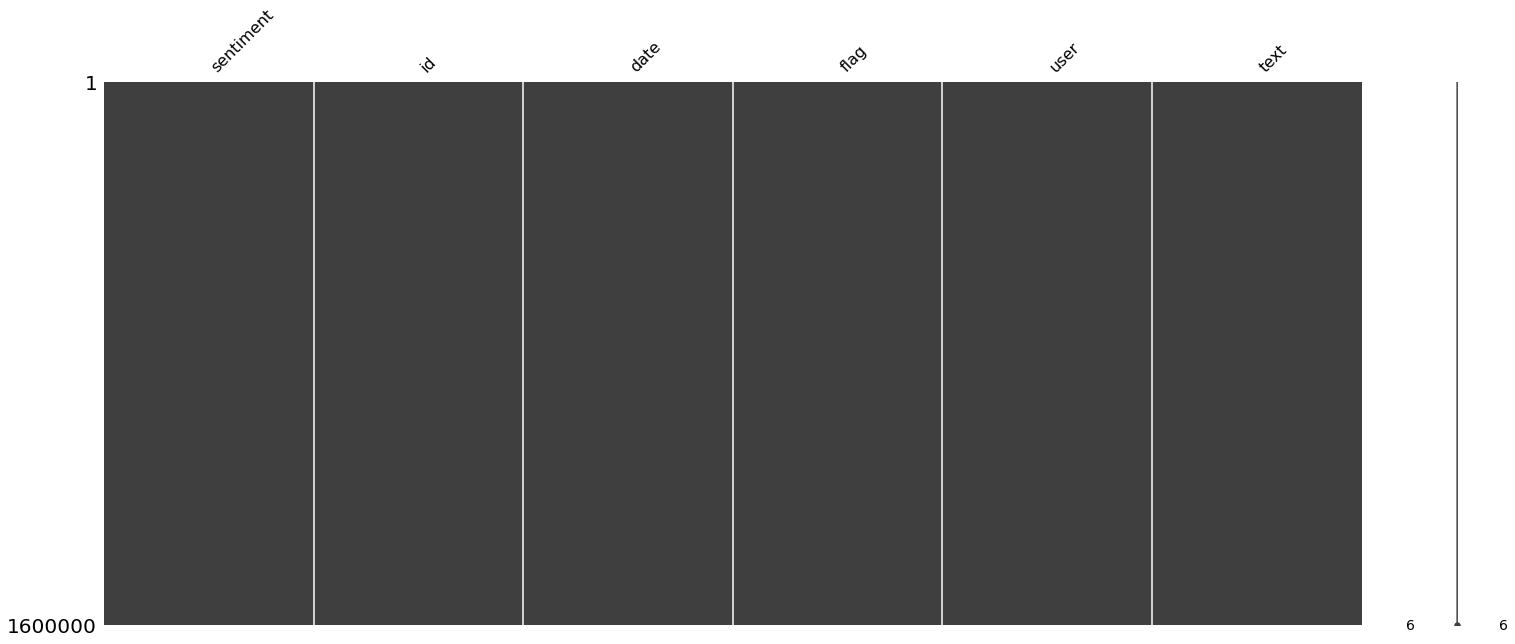

In [12]:
#matrix of features distribution
import missingno as msno
msno.matrix(dataset)

**We are plotting the distribution for the dataset to see whether we have equal number of positive and negatives tweets or not**

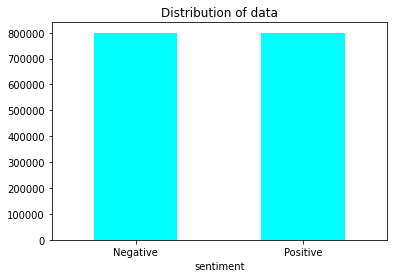

In [13]:
ax = dataset.groupby('sentiment').count().plot(kind='bar',color=['cyan'], title='Distribution of data',legend=False)
ax = ax.set_xticklabels(['Negative','Positive'], rotation=0)

**the graph mention that we have equal number of Positive/Negative tweets. Both equaling to 800000 tweets. This means our dataset is not skewed (balanced) which makes working on the dataset easier for us.**

# b. Data Preprocessing


# Checking missing values
**In order to check missing values in Pandas DataFrame, we use isnull() function .it helps in checking whether a value is NaN or not.**

In [14]:
print("Column    Missing values")
print("-----------------------------")
dataset.isnull().sum()

Column    Missing values
-----------------------------


sentiment    0
id           0
date         0
flag         0
user         0
text         0
dtype: int64

**=>There is no missing values**

# Checking duplicated values
**In order to check duplicated values we use duplicated() method to find duplicate rows in a Pandas DataFrame**

In [15]:
dataset.duplicated().sum()

0

**=>There is no missing values**

# Remove unnecessary columns

In [16]:
# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]

In [17]:
#the shape of dataset after removing some columns
print(f"The dataset contains {dataset.shape[0]} observations, from which we have {dataset.shape[1]} attributes")

The dataset contains 1600000 observations, from which we have 2 attributes


In [18]:
#columns observation
print(f"among their attributes, we observe {dataset.columns.tolist()}")

among their attributes, we observe ['sentiment', 'text']


In [19]:
#checking feature's type
dataset.dtypes

sentiment     int64
text         object
dtype: object

# Replace sentiment 4 by 1

In [20]:
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Processing the text 
**Text Preprocessing is a mandatory step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that deep learning algorithms can perform better.**

**Cleaning Stopwords**

In [21]:
#Cleaning and removing Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#stocking all the stop words in string
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [23]:
#Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head(10)

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    upset can't update Facebook texting it... migh...
2    @Kenichan I dived many times ball. Managed sav...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
5                                 @Kwesidei whole crew
6                                             Need hug
7    @LOLTrish hey long time see! Yes.. Rains bit ,...
8                                      @Tatiana_K nope
9                                @twittera que muera ?
Name: text, dtype: object

In [24]:
#Making statement text in lower case
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail(10)

1599990                                    wooooo! xbox back
1599991    @rmedina @latati mmmm that sounds absolutely p...
1599992                     recovering from the long weekend
1599993                                     @scooby_gritboys
1599994    @cliff_forster yeah, work better waiting in en...
1599995        just woke up. having school best feeling ever
1599996    thewdb.com - very cool hear old walt interview...
1599997                 are ready mojo makeover? ask details
1599998    happy 38th birthday boo alll time!!! tupac ama...
1599999    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, dtype: object

In [25]:
# Reading contractions.csv and storing it as a dict.
contractions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment/contractions.csv', index_col='Contraction')
contractions.index = contractions.index.str.lower()
contractions.Meaning = contractions.Meaning.str.lower()
contractions_dict = contractions.to_dict()['Meaning']

In [26]:
#the ten first samples of contractions dataset 
contractions.head(10)

,Meaning
Contraction,
'aight,alright
ain't,is not
amn't,am not
aren't,are not
can't,cannot
'cause,because
could've,could have
couldn't,could not
couldn't've,could not have


In [27]:
#shape of contractions dataset
contractions.shape

(148, 1)

In [28]:
# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
hashtagPattern    = '#[^\s]+'
alphaPattern      = "[^a-z0-9<>]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

In [29]:
# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

In [30]:
def preprocess(tweet):

    tweet = tweet.lower()
    # Replace all URls with '<url>'
    tweet = re.sub(urlPattern,'<url>',tweet)
    # Replace @USERNAME to '<user>'.
    tweet = re.sub(userPattern,'<user>', tweet)
    
    # Replace 3 or more consecutive letters by 2 letter.
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

    # Replace all emojis.
    tweet = re.sub(r'<3', '<heart>', tweet)
    tweet = re.sub(smileemoji, '<smile>', tweet)
    tweet = re.sub(sademoji, '<sadface>', tweet)
    tweet = re.sub(neutralemoji, '<neutralface>', tweet)
    tweet = re.sub(lolemoji, '<lolface>', tweet)

    for contraction, replacement in contractions_dict.items():
        tweet = tweet.replace(contraction, replacement)

    # Remove non-alphanumeric and symbols
    tweet = re.sub(alphaPattern, ' ', tweet)

    # Adding space on either side of '/' to seperate words (After replacing URLS).
    tweet = re.sub(r'/', ' / ', tweet)
    return tweet


In [31]:
#Cleaning up the tweet text and Adding 'processed_text' column which contain text after preprocess
dataset['processed_text'] = dataset.text.apply(preprocess)

In [32]:
#Testing
preprocess('@abcd i looooove it!!!')

'<user> i loove it  '

**=>the expected result**

In [33]:
#Testing
dataset.head()

,sentiment,text,processed_text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",<user> <url> aww thatis bummer you shoulda...
1,0,upset can't update facebook texting it... migh...,upset cannot update facebook texting it migh...
2,0,@kenichan i dived many times ball. managed sav...,<user> i dived many times ball managed save 5...
3,0,whole body feels itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, behaving all. i'm mad. he...",<user> no behaving all i am mad here i can...


# c. Analyzing the data
**In this sequence we are going to analyse the preprocessed data mainly to understand more our data.**

In [34]:
processedtext = list(dataset['processed_text'])
data_positive = processedtext[800000:]
data_negative = processedtext[:800000]

# WordCloud generation for postive and negative tweets
We will plot Word Clouds for Positive and Negative tweets from our dataset to see which words occur the most.

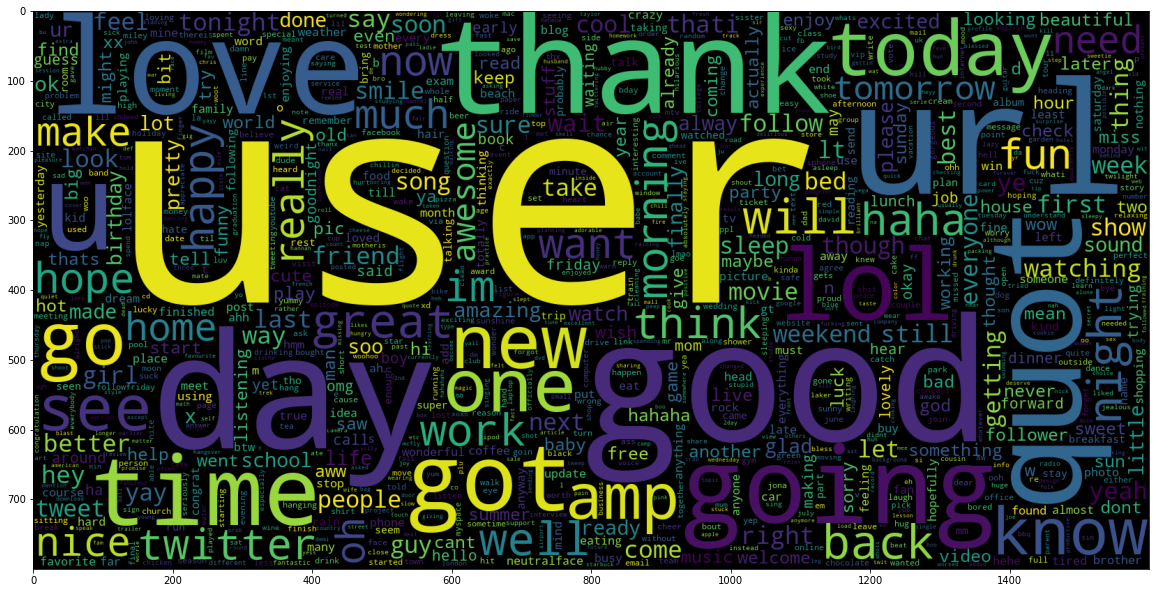

In [38]:
#for postive tweets
from wordcloud import WordCloud 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_positive))
plt.figure(figsize = (20,20))
plt.imshow(wc)

**=> for positive tweets the most occured words are user, good, thank, love.**

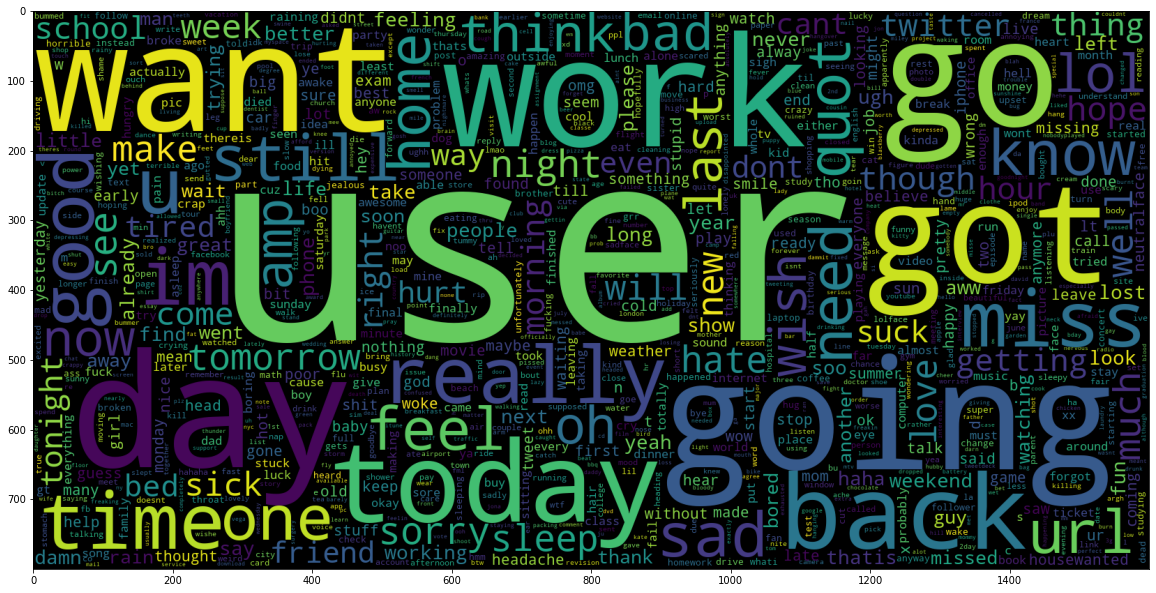

In [39]:
#for negative tweets
from wordcloud import WordCloud 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_negative))
plt.figure(figsize = (20,20))
plt.imshow(wc)

# d. Splitting the data
Machine Learning models are trained and tested on different sets of data. This is done so to reduce the chance of the model overfitting to the training data, i.e it fits well on the training dataset but a has poor fit with new ones.

sklearn.model_selection.train_test_split shuffles the dataset and splits it into train and test dataset.

The Pre-processed Data is divided into **2 sets** of data:

**Training Data: The dataset upon which the model would be trained on. Contains 80% data.**

**Test Data: The dataset upon which the model would be tested against. Contains 20% data.**

In [35]:
from sklearn.model_selection import train_test_split
X_data, y_data = np.array(dataset['processed_text']), np.array(dataset['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2, random_state = 0)

# e. Word Embedding
**One last step in data preparation is converting words into numbers. As computers can’t understand the text the way we do, we need to find a way to put the meaning of words into vectors.**

In [36]:
import gensim
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

**Word2Vec() function creates and trains the word embeddings using the data passed.**

In [37]:
Word2vec_train_data[0]

['<user>', 'thx', 'like', 'ur', 'pic', 'well']

Training Parameters:

**size: The number of dimensions that the Word2Vec maps the words onto.**
    
**workers: Specifies the number of worker threads for training parallelization.**
    
**min_count: min_count is for pruning the internal dictionary.** 

In [38]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=Embedding_dimensions, workers=8, min_count=5)


In [39]:
import gensim
print(gensim.__version__)

4.3.0


In [40]:
print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 47149


# Tokenization
Tokenization is a common task in Natural Language Processing (NLP). It’s a fundamental step in both traditional NLP methods like Count Vectorizer and Advanced Deep Learning-based architectures like Transformers.

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

In [41]:
input_length = 60
import nltk
nltk.download("punkt")
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [42]:
vocab_length = 60000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


Tokenizing the X_train and X_test dataset and padding them to the length 'input_length'.

The tokenized list is pre-padded, padding tokens are added to the start. After padding, the length of the data would be equal to 'input_length'.

In [43]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (1280000, 60)
X_test.shape : (320000, 60)


Embedding Matrix is a maxtrix of all words and their corresponding embeddings. We use embedding matrix in an Embedding layer in our model to embedded a token into it's vector representation, that contains information regarding that token or word.

In [44]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))
for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (60000, 100)


In [45]:
X_train.shape

(1280000, 60)

In [46]:
dataset.head()

,sentiment,text,processed_text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",<user> <url> aww thatis bummer you shoulda...
1,0,upset can't update facebook texting it... migh...,upset cannot update facebook texting it migh...
2,0,@kenichan i dived many times ball. managed sav...,<user> i dived many times ball managed save 5...
3,0,whole body feels itchy like fire,whole body feels itchy like fire
4,0,"@nationwideclass no, behaving all. i'm mad. he...",<user> no behaving all i am mad here i can...


# ***3.Creating the Model***
There are different approches which we can use to build our Sentiment analysis model. We're going to build a deep learning Sequence model.

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten , Bidirectional, GlobalMaxPool1D,LSTM, Conv1D

we create a simple Keras model:

Model Architecture:

Dense

Embedding

Flatten

In [48]:
def Model():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Flatten(),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

**Model Summary**


In [49]:
training_model = Model()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           6000000   
                                                                 
 flatten (Flatten)           (None, 6000)              0         
                                                                 
 dense (Dense)               (None, 1)                 6001      
                                                                 
Total params: 6,006,001
Trainable params: 6,001
Non-trainable params: 6,000,000
_________________________________________________________________


Callbacks are objects that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

# ***4. Training***

In [50]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

he Model must be compiled to define the loss, metrics and optimizer. Defining the proper loss and metric is essential while training the model.

**Loss**: We're using **Binary Crossentropy**. It is used when we have **binary output categories**.

**Metric:** We've selected **Accuracy** as it is one of the common evaluation metrics in **classification problems** when the category data is equal. 

**Optimizer:** We're using **Adam**, optimization algorithm for Gradient Descent. 

In [51]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

We'll now train our model using the **fit** method and store the output learning parameters in history, which can be used to plot out the learning curve.

Arguements:

**batch_size:** Number of samples per gradient update. Increasing the batch_size speeds up the training.

**epochs:** Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

**validation_split:** Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

**callbacks:** List of callbacks to apply during training process.

**verbose:** 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

In [52]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=10,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/10
1125/1125 [==============================] - 6s 3ms/step - loss: 0.5162 - accuracy: 0.7474 - val_loss: 0.5082 - val_accuracy: 0.7550 - lr: 0.0010
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5090 - accuracy: 0.7540 - val_loss: 0.5082 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5088 - accuracy: 0.7538 - val_loss: 0.5086 - val_accuracy: 0.7553 - lr: 0.0010
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5088 - accuracy: 0.7537 - val_loss: 0.5082 - val_accuracy: 0.7543 - lr: 0.0010
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5087 - accuracy: 0.7539 - val_loss: 0.5085 - val_accuracy: 0.7541 - lr: 0.0010
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 0.5086 - accuracy: 0.7539 - val_loss: 0.5080 - val_accuracy: 0.7544 - lr: 0.0010
Epoch 7/10
1125/1125 [==============================] - 3s

# ***5. Evaluation***
Since our dataset is not skewed, i.e. it has equal number of Positive and Negative Predictions. We're choosing Accuracy as our evaluation metric. Furthermore, we're plotting the Confusion Matrix to get an understanding of how our model is performing on both classification types.

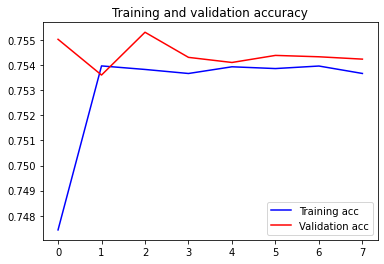

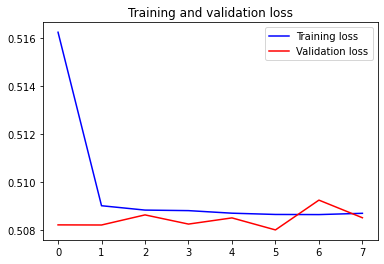

In [53]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Confusion matrix**

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


10000/10000 [==============================] - 14s 1ms/step


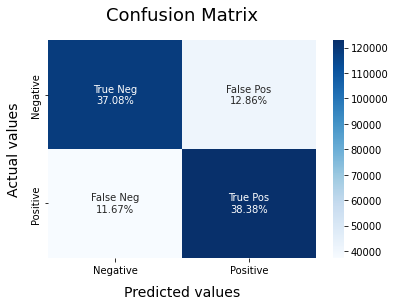

In [55]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

**Interpretation:**
There are two possible predicted classes: "1" and "0".

   True negative rate = 37.79% 
   
   False positive rate = 12.15% 
   
   False negative rate = 11.08% 
   
   True positive rate = 38.98% 
 
**Roc curve**



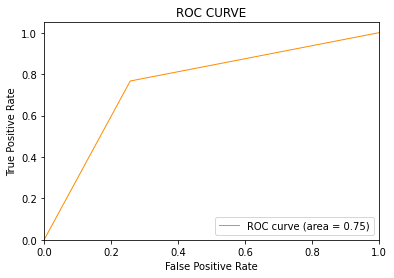

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

**Save the model**

In [57]:
training_model.save('Sentiment Analysis')
training_model.save_weights('model weights/weights')

**model improvement I**

Bidirectional: Bidirectional wrapper for RNNs. It means the context are carried from both left to right and right to left in the wrapped RNN layer.
 
LSTM: Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

In [58]:
def Model():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(50,return_sequences=True)),
        Flatten(),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

**Model summary**

In [59]:
training_model = Model()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 60, 100)           6000000   
                                                                 
 bidirectional (Bidirectiona  (None, 60, 100)          60400     
 l)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 6000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6001      
                                                                 
Total params: 6,066,401
Trainable params: 66,401
Non-trainable params: 6,000,000
_________________________________________________________________


**Training**

In [60]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [61]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=10,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/10
1125/1125 [==============================] - 29s 21ms/step - loss: 0.4547 - accuracy: 0.7832 - val_loss: 0.4354 - val_accuracy: 0.7956 - lr: 0.0010
Epoch 2/10
1125/1125 [==============================] - 25s 22ms/step - loss: 0.4278 - accuracy: 0.7996 - val_loss: 0.4267 - val_accuracy: 0.8008 - lr: 0.0010
Epoch 3/10
1125/1125 [==============================] - 26s 23ms/step - loss: 0.4179 - accuracy: 0.8053 - val_loss: 0.4245 - val_accuracy: 0.8022 - lr: 0.0010
Epoch 4/10
1125/1125 [==============================] - 24s 21ms/step - loss: 0.4114 - accuracy: 0.8091 - val_loss: 0.4213 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 5/10
1125/1125 [==============================] - 24s 21ms/step - loss: 0.4063 - accuracy: 0.8120 - val_loss: 0.4186 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 6/10
1125/1125 [==============================] - 24s 21ms/step - loss: 0.4023 - accuracy: 0.8142 - val_loss: 0.4186 - val_accuracy: 0.8056 - lr: 0.0010
Epoch 7/10
1125/1125 [========================

**model improvement II**

Overfitting is a term used in statistics that refers to a modeling error that occurs when a function corresponds too closely to a particular set of data. As a result, overfitting may fail to fit additional data, and this may affect the accuracy of predicting future observations.

The use of **dropout**, it is another regularization technique that prevents neural networks from overfitting.

It randomly drops some neurons except for the output layer from the neural network during training in each iteration or we can assign a probability p to all the neurons in a network so that they are temporarily ignored from calculations.

For our case we choose p=0.2

In [63]:
def Model():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(50,dropout=0.2,return_sequences=True)),
        Bidirectional(LSTM(50,dropout=0.2,return_sequences=True)),
        Flatten(),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [64]:
training_model = Model()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           6000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 100)          60400     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 60, 100)          60400     
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 6000)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6001      
                                                                 
Total params: 6,126,801
Trainable params: 126,801
N

**Training**

In [65]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [66]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = training_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/15
36000/36000 [==============================] - 640s 18ms/step - loss: 0.4490 - accuracy: 0.7868 - val_loss: 0.4261 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 2/15
36000/36000 [==============================] - 603s 17ms/step - loss: 0.4310 - accuracy: 0.7975 - val_loss: 0.4222 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 3/15
36000/36000 [==============================] - 604s 17ms/step - loss: 0.4263 - accuracy: 0.8002 - val_loss: 0.4181 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 4/15
36000/36000 [==============================] - 594s 16ms/step - loss: 0.4234 - accuracy: 0.8016 - val_loss: 0.4166 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/15
36000/36000 [==============================] - 591s 16ms/step - loss: 0.4213 - accuracy: 0.8032 - val_loss: 0.4155 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 6/15
36000/36000 [==============================] - 583s 16ms/step - loss: 0.4200 - accuracy: 0.8037 - val_loss: 0.4147 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 7/15
36000/36000 [====

 # ***6.Roberta Pretrained model***

In [ ]:
from transformers import BertTokenizer, TFBertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [ ]:
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='tf')
output = bert_model(encoded_input)